In [1]:
#We wish to illustrate the central limit theorem, which claims:

In [2]:
%%latex
$\newcommand{\Var}{\mathrm{Var}}$
Let $(X_i)_{i\in \mathbb{N}}$ be a sequence of iid random variables such that $\mbox{Var}(X_1)<\infty$. Then we have
\begin{equation}
\frac{\sum_{i=1}^nX_i-n\mathbb{E}[X_1]}{\sqrt{n\mbox{Var}(X_1)}}\to \mathcal{N}(0, 1)
\end{equation}
where the convergence holds in law, i.e. for all $z\in \mathbb{R}$, we have
\begin{equation}
\mathbb{P}\left( \frac{S_n-n\mathbb{E}[X_1]}{\sqrt{n\Var(X_1)}}\leq z\right)\to \Phi(z)
\end{equation}
where $\Phi$ is the cumulative distribution function of a standard normal.
We observe that 
\[
\mathbb{P}\left(  \frac{S_n-n\mathbb{E}[X_1]}{\sqrt{n\Var(X_1)}}\leq z\right)=\mathbb{E}\mathbb{1}_{ \frac{S_n-n\mathbb{E}[X_1]}{\sqrt{n\Var(X_1)}}\leq z}
\]
The expectation on the right hand side can be approximated by the law of large numbers. Let $(S^k_n)_{k\leq N}$ be iid realizations of $S_n=\sum_{i=1}^n X_i$. Then 
\[
\frac{1}{N}\sum_{k=1}^N\mathbb{1}_{ \frac{S^k_n-n\mathbb{E}[X_1]}{\sqrt{n\Var(X_1)}}\leq z}\to \mathbb{P}\left( \frac{S_n-n\mathbb{E}[X_1]}{\sqrt{n\Var(X_1)}}\leq z\right)
\]
Overall
\[
\lim_{n\to \infty}\lim_{N\to \infty} \frac{1}{N}\sum_{k=1}^N\mathbb{1}_{ \frac{S^k_n-n\mathbb{E}[X_1]}{\sqrt{n\Var(X_1)}}\leq z} =\Phi(z)
\]

<IPython.core.display.Latex object>

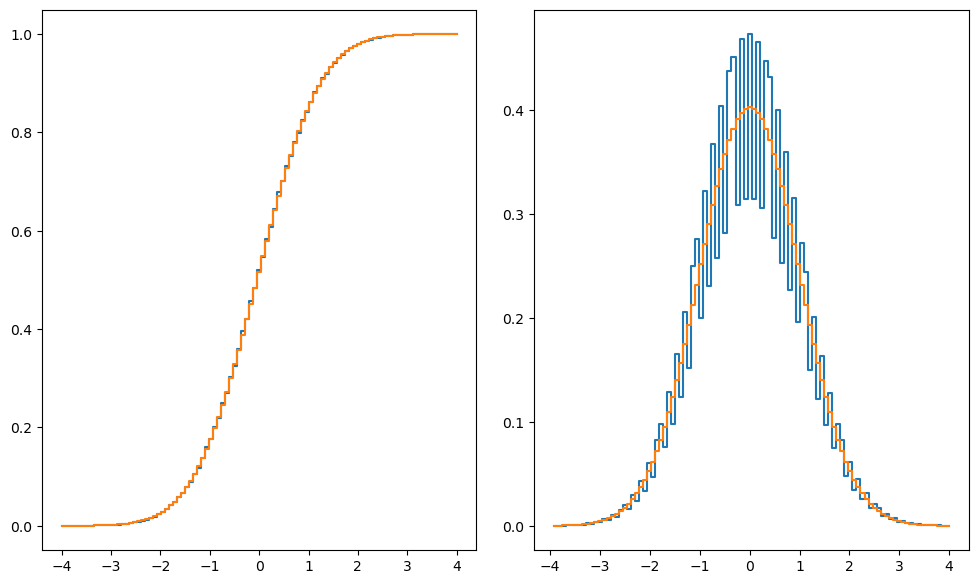

In [51]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import norm

#Suppose that X_1~Ber(1/2), i.e. S_n~Bin(n, 1/2)
p=0.001

#How many Bernoulli random variables do we sum over?
n=10**6
#How many samples do we take?
N=10**7
#We want to consider which values for z?
resolution=10**2
z=np.linspace(-4, 4, resolution)


#We take N samples of iid copies of S_n. Each S_n is binomially distributed with parameters (n, p)
sample=np.random.binomial(n, p, N)




# Standardize the samples (subtract mean and divide by standard deviation)
standardized_samples = (sample - n * p) / np.sqrt(n * p * (1 - p))

# Use vectorized comparison to calculate the CDF values
cdf = np.mean(standardized_samples[:, None] < z, axis=0)


"""
#Initialize list
cdf=np.zeros(len(z))
#Construct indicator function and sum over it to approximate expectation
for i in range(len(z)):
    cdf[i]=1/N * np.sum([1 if (x-n*p)/(np.sqrt(n*p*(1-p)))<z[i] else 0 for x in sample])
"""  



#We also want to look at the implied densities
cdf_diff=np.diff(cdf)
cdf_diff_norm=np.diff(norm.cdf(z))
z_1=z[1:]
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
fig.tight_layout()
axes[0].step(z, cdf)
axes[0].step(z, norm.cdf(z))
axes[1].step(z_1, cdf_diff/(8/resolution))
axes[1].step(z_1, cdf_diff_norm/(8/resolution))

#plt.step(z, cdf)
#plt.step(z, norm.cdf(z))

#plt.bar(z, (norm.cdf(z)-cdf))

plt.show()